In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
%matplotlib inline

In [6]:
uni20_df = pd.read_csv("ef2020cp.csv")

In [7]:
uni20_df.head()

UNITID  EFCIPLEV  CIPCODE  LINE  SECTION  LSTUDY XEFTOTLT  EFTOTLT  \
0  100654       101     13.0    29        3       1        R      331   
1  100654       102     13.0    99        3       2        R      278   
2  100654       103     13.0    99        3       3        R      278   
3  100654       104     13.0    99        3       4        R       88   
4  100654       105     13.0    99        3       5        R      190   

  XEFTOTLM  EFTOTLM  ... XEFUNKNM  EFUNKNM XEFUNKNW  EFUNKNW XEFNRALT  \
0        R       70  ...        R        7        R       27        R   
1        R       57  ...        R        3        R       15        R   
2        R       57  ...        R        3        R       15        R   
3        R       17  ...        R        1        R        3        R   
4        R       40  ...        R        2        R       12        R   

   EFNRALT XEFNRALM  EFNRALM XEFNRALW  EFNRALW   
0        0        R        0        R         0  
1        0        R        0        R         0  
2        0        R        0        R         0  
3        0        R        0        R         0  
4        0        R        0        R         0  

[5 rows x 66 columns]

In [8]:
uni20_df1 = uni20_df[['UNITID','EFCIPLEV', 'CIPCODE', 'EFTOTLT', 'EFTOTLM', 'EFTOTLW']]

In [9]:
uni20_df1.head()

UNITID  EFCIPLEV  CIPCODE  EFTOTLT  EFTOTLM  EFTOTLW
0  100654       101     13.0      331       70      261
1  100654       102     13.0      278       57      221
2  100654       103     13.0      278       57      221
3  100654       104     13.0       88       17       71
4  100654       105     13.0      190       40      150

In [10]:
uni20_df1.groupby('EFCIPLEV')['EFTOTLW'].sum()

EFCIPLEV
101    741507
102    370363
103    362393
104     50402
105    311991
        ...  
836     13738
856        77
916     46895
936     46482
956       413
Name: EFTOTLW, Length: 171, dtype: int64

In [11]:
uni20_df2 = uni20_df1.loc[uni20_df1["EFCIPLEV"].isin([202])]

In [12]:
uni20_df2

UNITID  EFCIPLEV  CIPCODE  EFTOTLT  EFTOTLM  EFTOTLW
25      100654       202     14.0      578      434      144
164     100663       202     14.0      558      382      176
326     100706       202     14.0     2792     2203      589
468     100724       202     14.0       60       28       32
602     100751       202     14.0     4383     3405      978
...        ...       ...      ...      ...      ...      ...
162599  486840       202     14.0     4400     3761      639
162741  486901       202     14.0       90       75       15
163403  490805       202     14.0      562      476       86
163700  492962       202     14.0      356      291       65
163913  495767       202     14.0    12082     9584     2498

[775 rows x 6 columns]

In [13]:
uni20_df3 = uni20_df2[['UNITID','EFTOTLT', 'EFTOTLM', 'EFTOTLW']]

In [14]:
uni20_df3

UNITID  EFTOTLT  EFTOTLM  EFTOTLW
25      100654      578      434      144
164     100663      558      382      176
326     100706     2792     2203      589
468     100724       60       28       32
602     100751     4383     3405      978
...        ...      ...      ...      ...
162599  486840     4400     3761      639
162741  486901       90       75       15
163403  490805      562      476       86
163700  492962      356      291       65
163913  495767    12082     9584     2498

[775 rows x 4 columns]

In [15]:
uni20_df5 = uni20_df3.reset_index(drop=True)
uni20_df5

UNITID  EFTOTLT  EFTOTLM  EFTOTLW
0    100654      578      434      144
1    100663      558      382      176
2    100706     2792     2203      589
3    100724       60       28       32
4    100751     4383     3405      978
..      ...      ...      ...      ...
770  486840     4400     3761      639
771  486901       90       75       15
772  490805      562      476       86
773  492962      356      291       65
774  495767    12082     9584     2498

[775 rows x 4 columns]

In [16]:
uni20_df5['W/M_Ratio'] = uni20_df5['EFTOTLW']/uni20_df5['EFTOTLM']
uni20_df5

UNITID  EFTOTLT  EFTOTLM  EFTOTLW  W/M_Ratio
0    100654      578      434      144   0.331797
1    100663      558      382      176   0.460733
2    100706     2792     2203      589   0.267363
3    100724       60       28       32   1.142857
4    100751     4383     3405      978   0.287225
..      ...      ...      ...      ...        ...
770  486840     4400     3761      639   0.169902
771  486901       90       75       15   0.200000
772  490805      562      476       86   0.180672
773  492962      356      291       65   0.223368
774  495767    12082     9584     2498   0.260643

[775 rows x 5 columns]

# Bring in University Location Data

In [17]:
UniLoc = pd.read_csv("UniversityID_Lat_Long_ONLY.csv")

In [18]:
UniLoc.head(10)

UNITID                               INSTNM            CITY STABBR  \
0  100654             Alabama A & M University          Normal     AL   
1  100663  University of Alabama at Birmingham      Birmingham     AL   
2  100690                   Amridge University      Montgomery     AL   
3  100706  University of Alabama in Huntsville      Huntsville     AL   
4  100724             Alabama State University      Montgomery     AL   
5  100751            The University of Alabama      Tuscaloosa     AL   
6  100760    Central Alabama Community College  Alexander City     AL   
7  100812              Athens State University          Athens     AL   
8  100830      Auburn University at Montgomery      Montgomery     AL   
9  100858                    Auburn University          Auburn     AL   

          ZIP   LATITUDE  LONGITUDE  
0       35762  34.783368 -86.568502  
1  35294-0110  33.505697 -86.799345  
2  36117-3553  32.362609 -86.174010  
3       35899  34.724557 -86.640449  
4  36104-0271  32.364317 -86.295677  
5  35487-0100  33.211875 -87.545978  
6       35010  32.924780 -85.945266  
7       35611  34.806793 -86.964698  
8  36117-3596  32.367360 -86.177544  
9       36849  32.599378 -85.488258

JOIN!

In [19]:
df2020 = pd.merge(uni20_df5, UniLoc, on = "UNITID")
df2020

UNITID  EFTOTLT  EFTOTLM  EFTOTLW  W/M_Ratio  \
0    100654      578      434      144   0.331797   
1    100663      558      382      176   0.460733   
2    100706     2792     2203      589   0.267363   
3    100724       60       28       32   1.142857   
4    100751     4383     3405      978   0.287225   
..      ...      ...      ...      ...        ...   
769  485768        2        2        0   0.000000   
770  486840     4400     3761      639   0.169902   
771  486901       90       75       15   0.200000   
772  490805      562      476       86   0.180672   
773  492962      356      291       65   0.223368   

                                                INSTNM        CITY STABBR  \
0                             Alabama A & M University      Normal     AL   
1                  University of Alabama at Birmingham  Birmingham     AL   
2                  University of Alabama in Huntsville  Huntsville     AL   
3                             Alabama State University  Montgomery     AL   
4                            The University of Alabama  Tuscaloosa     AL   
..                                                 ...         ...    ...   
769                                Atlantis University       Miami     FL   
770                          Kennesaw State University    Kennesaw     GA   
771                                Milligan University    Milligan     TN   
772                        Purdue University Northwest     Hammond     IN   
773  Indiana Institute of Technology-College of Pro...  Fort Wayne     IN   

            ZIP   LATITUDE  LONGITUDE  
0         35762  34.783368 -86.568502  
1    35294-0110  33.505697 -86.799345  
2         35899  34.724557 -86.640449  
3    36104-0271  32.364317 -86.295677  
4    35487-0100  33.211875 -87.545978  
..          ...        ...        ...  
769       33132  25.788978 -80.189420  
770       30144  34.038807 -84.583052  
771       37682  36.300147 -82.294070  
772       46323  41.584324 -87.474236  
773       46803  41.076613 -85.115424  

[774 rows x 11 columns]

Change to GEO Dataframe

In [20]:
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(df2020["LONGITUDE"], df2020["LATITUDE"])]
geometry[:3]
geo_df2020 = gpd.GeoDataFrame(df2020, crs = crs, geometry = geometry)
geo_df2020.head()

C:\tools\Anaconda3\envs\GeoSpacial\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


UNITID  EFTOTLT  EFTOTLM  EFTOTLW  W/M_Ratio  \
0  100654      578      434      144   0.331797   
1  100663      558      382      176   0.460733   
2  100706     2792     2203      589   0.267363   
3  100724       60       28       32   1.142857   
4  100751     4383     3405      978   0.287225   

                                INSTNM        CITY STABBR         ZIP  \
0             Alabama A & M University      Normal     AL       35762   
1  University of Alabama at Birmingham  Birmingham     AL  35294-0110   
2  University of Alabama in Huntsville  Huntsville     AL       35899   
3             Alabama State University  Montgomery     AL  36104-0271   
4            The University of Alabama  Tuscaloosa     AL  35487-0100   

    LATITUDE  LONGITUDE                    geometry  
0  34.783368 -86.568502  POINT (-86.56850 34.78337)  
1  33.505697 -86.799345  POINT (-86.79935 33.50570)  
2  34.724557 -86.640449  POINT (-86.64045 34.72456)  
3  32.364317 -86.295677  POINT (-86.29568 32.36432)  
4  33.211875 -87.545978  POINT (-87.54598 33.21187)

In [21]:
#geo_df2020.to_csv('geo_df2020.csv', index = False)

In [22]:
#add a "percent women" column
geo_df2020['PERCENT_WOMEN'] = geo_df2020['EFTOTLW']/geo_df2020['EFTOTLT'] 

In [23]:
geo_df2020.head()

UNITID  EFTOTLT  EFTOTLM  EFTOTLW  W/M_Ratio  \
0  100654      578      434      144   0.331797   
1  100663      558      382      176   0.460733   
2  100706     2792     2203      589   0.267363   
3  100724       60       28       32   1.142857   
4  100751     4383     3405      978   0.287225   

                                INSTNM        CITY STABBR         ZIP  \
0             Alabama A & M University      Normal     AL       35762   
1  University of Alabama at Birmingham  Birmingham     AL  35294-0110   
2  University of Alabama in Huntsville  Huntsville     AL       35899   
3             Alabama State University  Montgomery     AL  36104-0271   
4            The University of Alabama  Tuscaloosa     AL  35487-0100   

    LATITUDE  LONGITUDE                    geometry  PERCENT_WOMEN  
0  34.783368 -86.568502  POINT (-86.56850 34.78337)       0.249135  
1  33.505697 -86.799345  POINT (-86.79935 33.50570)       0.315412  
2  34.724557 -86.640449  POINT (-86.64045 34.72456)       0.210960  
3  32.364317 -86.295677  POINT (-86.29568 32.36432)       0.533333  
4  33.211875 -87.545978  POINT (-87.54598 33.21187)       0.223135

Import USA GeoData

<AxesSubplot:>

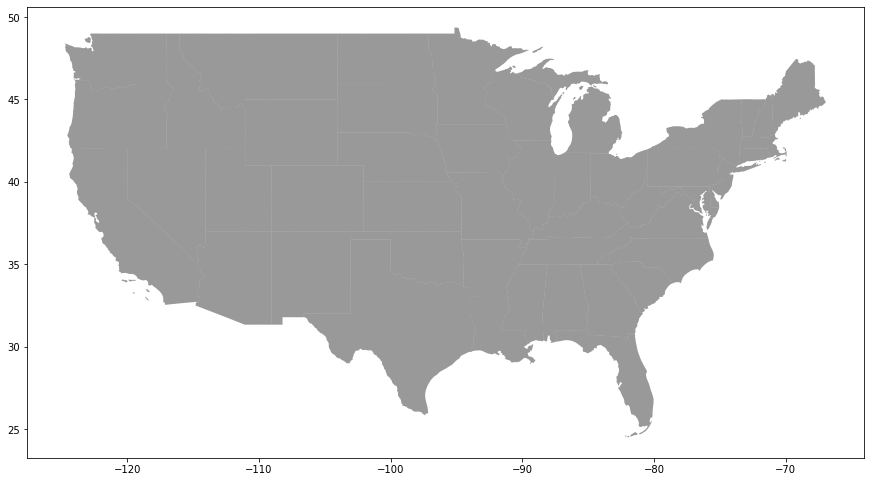

In [24]:
file = "cb_2017_us_state_20m"
USA_gdf = gpd.read_file(file)
USA_gdf = USA_gdf.set_index("STUSPS")
USA_gdf1 = USA_gdf.drop(['AK', 'HI', 'PR'])

fig, ax = plt.subplots(figsize=(15, 15))
USA_gdf1.plot(ax=ax, alpha = 0.4, color = "k")

Put the universitities on the map.

<AxesSubplot:>

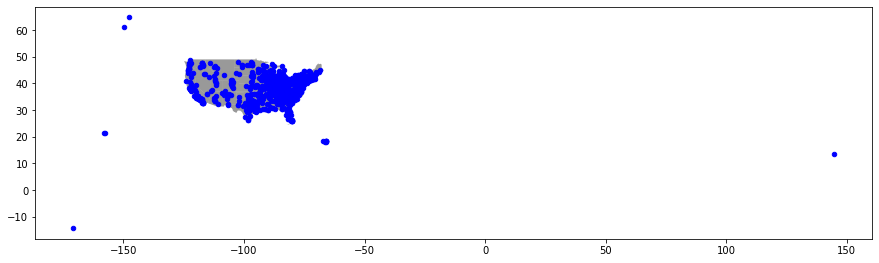

In [25]:
fig, ax = plt.subplots(figsize=(15, 15))
USA_gdf1.plot(ax=ax, alpha = 0.4, color = "k")
geo_df2020.plot(ax=ax, markersize = 20, color = "blue")

In [1]:
#originally this got rid of the schools outside of the contiguous USA, but after fixing the data wrangling error the rows no longer match up
#geo_df2020_1 = geo_df2020.drop(index=[12, 13, 163, 164, 746, 747, 748, 749, 750, 751, 752, 753, 757])

<AxesSubplot:>

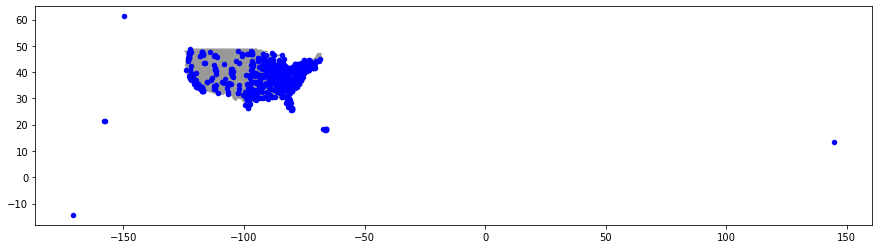

In [27]:
#fig, ax = plt.subplots(figsize=(15, 15))
#USA_gdf1.plot(ax=ax, alpha = 0.4, color = "k")
#geo_df2020_1.plot(ax=ax, markersize = 20, color = "blue")

Play with the map

In [34]:
USA_gdf1.head()

STATEFP   STATENS     AFFGEOID GEOID                  NAME LSAD  \
STUSPS                                                                   
CA          06  01779778  0400000US06    06            California   00   
CO          08  01779779  0400000US08    08              Colorado   00   
DC          11  01702382  0400000US11    11  District of Columbia   00   
ID          16  01779783  0400000US16    16                 Idaho   00   
IL          17  01779784  0400000US17    17              Illinois   00   

               ALAND       AWATER  \
STUSPS                              
CA      403483182192  20484637928   
CO      268425964573   1178495763   
DC         158351639     18675956   
ID      214048160737   2393355752   
IL      143784114293   6211277447   

                                                 geometry  
STUSPS                                                     
CA      MULTIPOLYGON (((-118.59397 33.46720, -118.4847...  
CO      POLYGON ((-109.05996 38.49999, -109.05996 38.4...  
DC      POLYGON ((-77.11976 38.93434, -77.04102 38.995...  
ID      POLYGON ((-117.24303 44.39097, -117.21507 44.4...  
IL      POLYGON ((-91.50617 40.20064, -91.49696 40.248...

In [43]:
USA_gdf2 = USA_gdf1.rename(columns = {"STUSPS":"STABBR"})

In [44]:
USA_gdf2

STATEFP   STATENS     AFFGEOID GEOID                  NAME LSAD  \
STUSPS                                                                   
CA          06  01779778  0400000US06    06            California   00   
CO          08  01779779  0400000US08    08              Colorado   00   
DC          11  01702382  0400000US11    11  District of Columbia   00   
ID          16  01779783  0400000US16    16                 Idaho   00   
IL          17  01779784  0400000US17    17              Illinois   00   
IA          19  01779785  0400000US19    19                  Iowa   00   
KY          21  01779786  0400000US21    21              Kentucky   00   
LA          22  01629543  0400000US22    22             Louisiana   00   
MD          24  01714934  0400000US24    24              Maryland   00   
MN          27  00662849  0400000US27    27             Minnesota   00   
MO          29  01779791  0400000US29    29              Missouri   00   
NY          36  01779796  0400000US36    36              New York   00   
OR          41  01155107  0400000US41    41                Oregon   00   
TN          47  01325873  0400000US47    47             Tennessee   00   
TX          48  01779801  0400000US48    48                 Texas   00   
VA          51  01779803  0400000US51    51              Virginia   00   
WI          55  01779806  0400000US55    55             Wisconsin   00   
AL          01  01779775  0400000US01    01               Alabama   00   
AZ          04  01779777  0400000US04    04               Arizona   00   
AR          05  00068085  0400000US05    05              Arkansas   00   
IN          18  00448508  0400000US18    18               Indiana   00   
KS          20  00481813  0400000US20    20                Kansas   00   
ME          23  01779787  0400000US23    23                 Maine   00   
CT          09  01779780  0400000US09    09           Connecticut   00   
DE          10  01779781  0400000US10    10              Delaware   00   
GA          13  01705317  0400000US13    13               Georgia   00   
SC          45  01779799  0400000US45    45        South Carolina   00   
SD          46  01785534  0400000US46    46          South Dakota   00   
MA          25  00606926  0400000US25    25         Massachusetts   00   
MI          26  01779789  0400000US26    26              Michigan   00   
MS          28  01779790  0400000US28    28           Mississippi   00   
NE          31  01779792  0400000US31    31              Nebraska   00   
NV          32  01779793  0400000US32    32                Nevada   00   
NH          33  01779794  0400000US33    33         New Hampshire   00   
NJ          34  01779795  0400000US34    34            New Jersey   00   
NM          35  00897535  0400000US35    35            New Mexico   00   
NC          37  01027616  0400000US37    37        North Carolina   00   
ND          38  01779797  0400000US38    38          North Dakota   00   
RI          44  01219835  0400000US44    44          Rhode Island   00   
OH          39  01085497  0400000US39    39                  Ohio   00   
OK          40  01102857  0400000US40    40              Oklahoma   00   
PA          42  01779798  0400000US42    42          Pennsylvania   00   
FL          12  00294478  0400000US12    12               Florida   00   
MT          30  00767982  0400000US30    30               Montana   00   
UT          49  01455989  0400000US49    49                  Utah   00   
VT          50  01779802  0400000US50    50               Vermont   00   
WA          53  01779804  0400000US53    53            Washington   00   
WV          54  01779805  0400000US54    54         West Virginia   00   
WY          56  01779807  0400000US56    56               Wyoming   00   

               ALAND        AWATER  \
STUSPS                               
CA      403483182192   20484637928   
CO      268425964573    1178495763   
DC         158351639      18675956   
ID      214048160737    2393355752   
IL  

In [28]:
import folium
import folium.plugins
import branca.colormap as cm

In [29]:
map = folium.Map(location=[38, -98], zoom_start=4.2)
for i in range(len(geo_df2020)):    
     folium.Circle(        
          location=[geo_df2020.iloc[i]['LATITUDE'], geo_df2020.iloc[i]['LONGITUDE']],
          radius=10,    
     ).add_to(map)
map

In [30]:
colormap = cm.LinearColormap(colors = ["MediumBlue", "Magenta"], index=None, vmin=0.0, vmax=.5
                        )
map = folium.Map(location=[38, -98], zoom_start=4.2)
for i in range(len(geo_df2020)):    
     folium.CircleMarker(        
        location=[geo_df2020.iloc[i]['LATITUDE'], geo_df2020.iloc[i]['LONGITUDE']],
        radius=7, 
        fill=True,
        color=colormap(geo_df2020.iloc[i]['PERCENT_WOMEN']),
        fill_opacity=0.3,
        popup = "Percentage of Engineering Students that are women: %s"%geo_df2020.iloc[i]['PERCENT_WOMEN'],
        tooltip = geo_df2020.iloc[i]['INSTNM']
    ).add_to(map)
map.add_child(colormap)

In [51]:
colormap = cm.LinearColormap(colors = ["MediumBlue", "Magenta"], index=None, vmin=0.0, vmax=.5
                                                    )
map = folium.Map(location=[38, -98], zoom_start=4.2)
for i in range(len(geo_df2020)):
    html=f"""
        <h2> {geo_df2020.iloc[i]['INSTNM']}</h2>
        <ul>
            <li>Undergraduate Engineering Students: {geo_df2020.iloc[i]['EFTOTLT']}</li>
            <li>Number that are Women: {geo_df2020.iloc[i]['EFTOTLW']}</li>
            <li>Percent that are Women: {geo_df2020.iloc[i]['PERCENT_WOMEN'].round(3)*100} %</li>
        </ul>
        """
    iframe = folium.IFrame(html=html, width=300, height=175)
    popup = folium.Popup(iframe, max_width=2650)
    folium.CircleMarker(        
        location=[geo_df2020.iloc[i]['LATITUDE'], geo_df2020.iloc[i]['LONGITUDE']],
        radius=7, 
        fill=True,
        color=colormap(geo_df2020.iloc[i]['PERCENT_WOMEN']),
        fill_opacity=0.3,
        popup = popup,
        tooltip = geo_df2020.iloc[i]['INSTNM']
    ).add_to(map)
map.add_child(colormap)

In [32]:
colormap = cm.LinearColormap(colors = ["MediumBlue", "Magenta"], index=None, vmin=0.0, vmax=.5
                        )
map = folium.Map(location=[38, -98], zoom_start=4.2)
for i in range(len(geo_df2020)):    
     folium.Marker(        
        location=[geo_df2020.iloc[i]['LATITUDE'], geo_df2020.iloc[i]['LONGITUDE']],
        fill=True,
        color=colormap(geo_df2020.iloc[i]['PERCENT_WOMEN']),
        fill_opacity=0.5,
        popup = geo_df2020.iloc[i]['INSTNM']
    ).add_to(map)
map.add_child(colormap)